<h1 align='center'>Car Price Prediction Using Linear and Lasso regression</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
car_dataset=pd.read_csv('../Datasets/car data/car data.csv')
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [4]:
car_dataset.Fuel_Type.value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [5]:
car_dataset.Seller_Type.value_counts()

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

In [6]:
car_dataset.Fuel_Type=pd.factorize(car_dataset.Fuel_Type)[0]
car_dataset.Seller_Type=pd.factorize(car_dataset.Seller_Type)[0]
car_dataset.Transmission=pd.factorize(car_dataset.Transmission)[0]

In [7]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [8]:
X=car_dataset.drop(columns=['Car_Name','Selling_Price'],axis=1)
Y=car_dataset.Selling_Price

In [9]:
X.shape,Y.shape

((301, 7), (301,))

In [10]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=2,test_size=0.2)

## Using Linear Regression

In [11]:
model=LinearRegression()

In [12]:
model.fit(X_train,Y_train)

LinearRegression()

In [13]:
predicted_y_train=model.predict(X_train)

In [14]:
predicted_y_test=model.predict(X_test)

In [15]:
metrics.r2_score(predicted_y_train,Y_train),metrics.r2_score(predicted_y_test,Y_test)

(0.8685439505823466, 0.8193296211106067)

## Using Lasso Regression

In [16]:
model1=Lasso()
model1.fit(X_train,Y_train)

Lasso()

In [17]:
predicted_y_train1=model1.predict(X_train)

In [18]:
predicted_y_test1=model1.predict(X_test)

In [19]:
metrics.r2_score(predicted_y_train1,Y_train),metrics.r2_score(predicted_y_test1,Y_test)

(0.7999397993548054, 0.7717678246278714)

## Visualizing Actual price vs Predicted Price

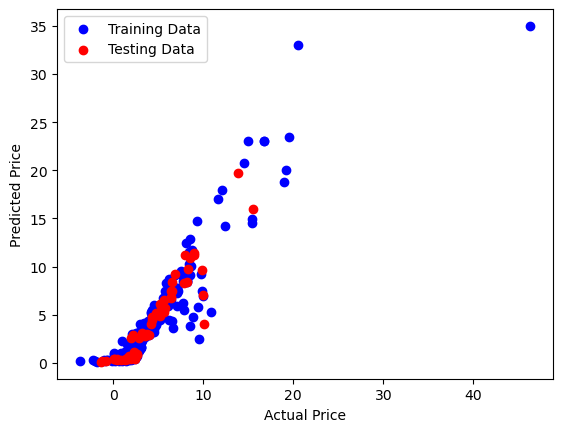

In [20]:
plt.scatter(predicted_y_train1,Y_train,color='blue',label='Training Data')
plt.scatter(predicted_y_test1,Y_test,color='red',label='Testing Data')
plt.legend()
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()